In [5]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
df = pd.read_csv('IMDB Dataset.csv',engine='python',error_bad_lines=False)

<ipython-input-6-911d29110e86>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('IMDB Dataset.csv',engine='python',error_bad_lines=False)
Skipping line 5503: unexpected end of data


In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [9]:
print('length of data is', len(df))

length of data is 5501


In [10]:
df. shape

(5501, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5501 entries, 0 to 5500
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5501 non-null   object
 1   sentiment  5501 non-null   object
dtypes: object(2)
memory usage: 86.1+ KB


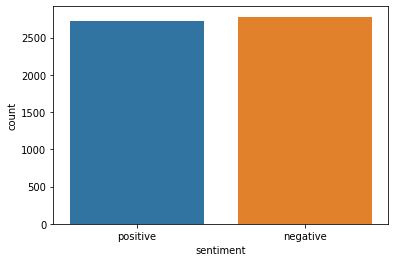

In [12]:
sns.countplot(x ='sentiment', data = df)
 
# Show the plot
plt.show()

In [13]:
for i in range(5):
  print("Review number ",[i],"\n")
  print(df['review'].iloc[i], "\n")
  print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review number  [0] 

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the s

In [14]:
# let's define function to count number of words in each review

def count_words(text):
  words = text.split()
  num_words = len(words)
  return num_words

In [15]:
df['word count'] = df['review'].apply(count_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


Text(0.5, 1.0, 'Distrbution of negative reviews')

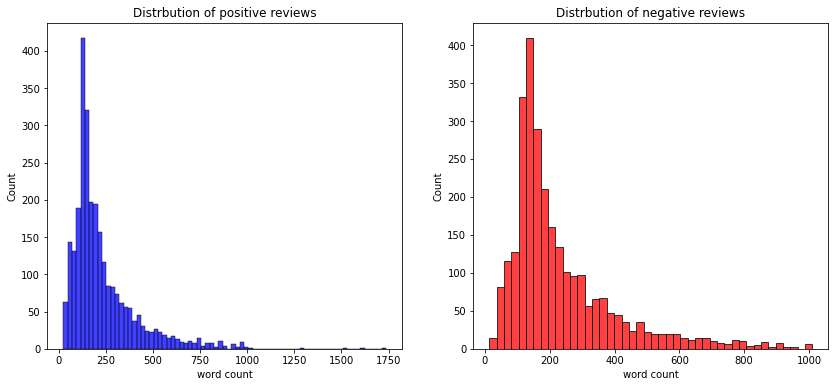

In [16]:
# let's see the number of words for each sentiment
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(df[df['sentiment'] == 'positive']['word count'], ax=ax[0], color='blue')
ax[0].set_title('Distrbution of positive reviews')
sns.histplot(df[df['sentiment'] == 'negative']['word count'], ax=ax[1], color='red')
ax[1].set_title('Distrbution of negative reviews')

# **Processing**

In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [19]:
# define function to clean the reviews
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

def preprocess(text):
  soup = BeautifulSoup(text, "html.parser") #Removing the html strips
  text = soup.get_text()
  text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
  text = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", text, flags = re.MULTILINE)  #Removing emails 
  text = re.sub('\[[^]]*\]', '', text)  #Removing the square brackets
  text = re.sub(r'[^a-zA-z0-9\s]', '', text)  #Removing special character and keep only words and numbers
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]  #Removing stop words
  new_text = " ".join(filtered_text)
  ps = nltk.porter.PorterStemmer()  #Stemming the text
  new_text = ' '.join([ps.stem(word) for word in new_text.split()])
  return new_text

In [20]:
# check it
preprocess("hello we will study natural language processing via this notebook")

'hello studi natur languag process via notebook'

In [21]:
# let's see duplicated reviews if any before preprocessing
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  3


In [22]:
# let's apply it on reviews
df.review = df['review'].apply(preprocess)

<ipython-input-19-bbf0e82e5d44>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser") #Removing the html strips


In [23]:
# check duplicated after preprocessing
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  3


In [24]:
# let's drop all duplicated reviews
df = df.drop_duplicates('review')

In [25]:
# let's count the words in each review again
df['new word count'] = df['review'].apply(count_words)

<ipython-input-25-5b0ce79a1965>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new word count'] = df['review'].apply(count_words)


In [26]:
# encoding the sentiment
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

<ipython-input-26-66e931e19c03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sentiment.replace("positive", 1, inplace=True)
<ipython-input-26-66e931e19c03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sentiment.replace("negative", 0, inplace=True)


In [27]:
df.head()

,review,sentiment,word count,new word count
0,one review mention watch 1 oz episod youll hoo...,1,307,179
1,a wonder littl product the film techniqu unass...,1,162,91
2,i thought wonder way spend time hot summer wee...,1,166,92
3,basic there famili littl boy jake think there ...,0,138,71
4,petter mattei love time money visual stun film...,1,230,130


In [28]:
#word cloud for positive review words
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count,new word count
0,one review mention watch 1 oz episod youll hoo...,1,307,179
1,a wonder littl product the film techniqu unass...,1,162,91
2,i thought wonder way spend time hot summer wee...,1,166,92
4,petter mattei love time money visual stun film...,1,230,130
5,probabl alltim favorit movi stori selfless sac...,1,119,63


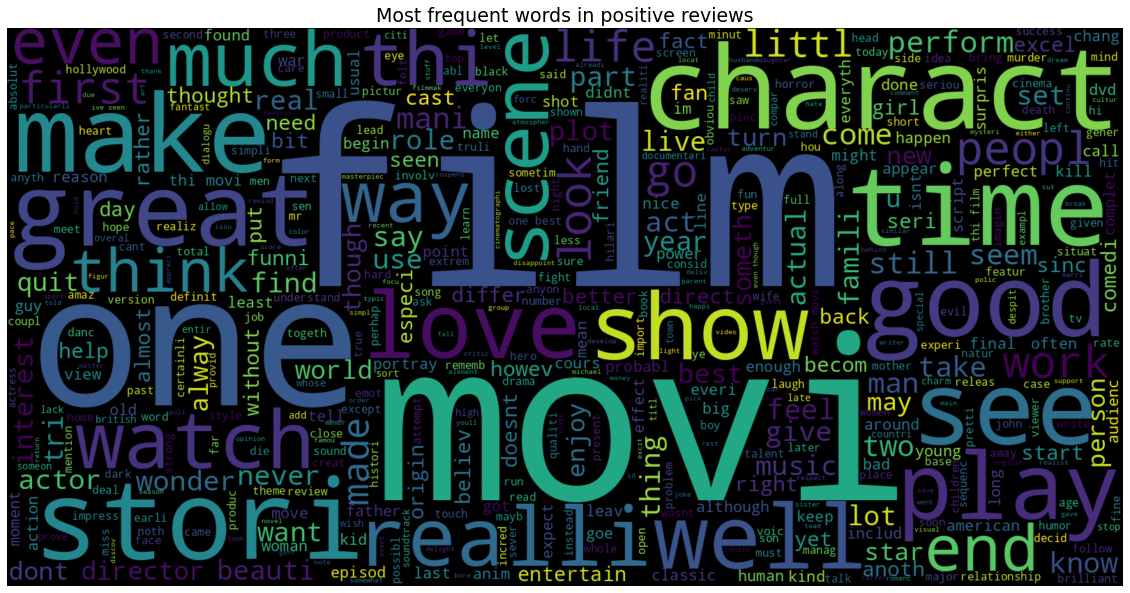

In [29]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [30]:
# print the first 10th most common words
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(10)

[('i', 6883),
 ('film', 5160),
 ('movi', 4776),
 ('the', 4133),
 ('one', 2935),
 ('like', 2073),
 ('it', 1978),
 ('time', 1617),
 ('see', 1587),
 ('good', 1538)]

In [31]:
#word cloud for negitive review words
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word count,new word count
3,basic there famili littl boy jake think there ...,0,138,71
7,thi show amaz fresh innov idea 70 first air th...,0,174,93
8,encourag posit comment film i look forward wat...,0,130,68
10,phil alien one quirki film humour base around ...,0,96,53
11,i saw movi i 12 came i recal scariest scene bi...,0,180,96


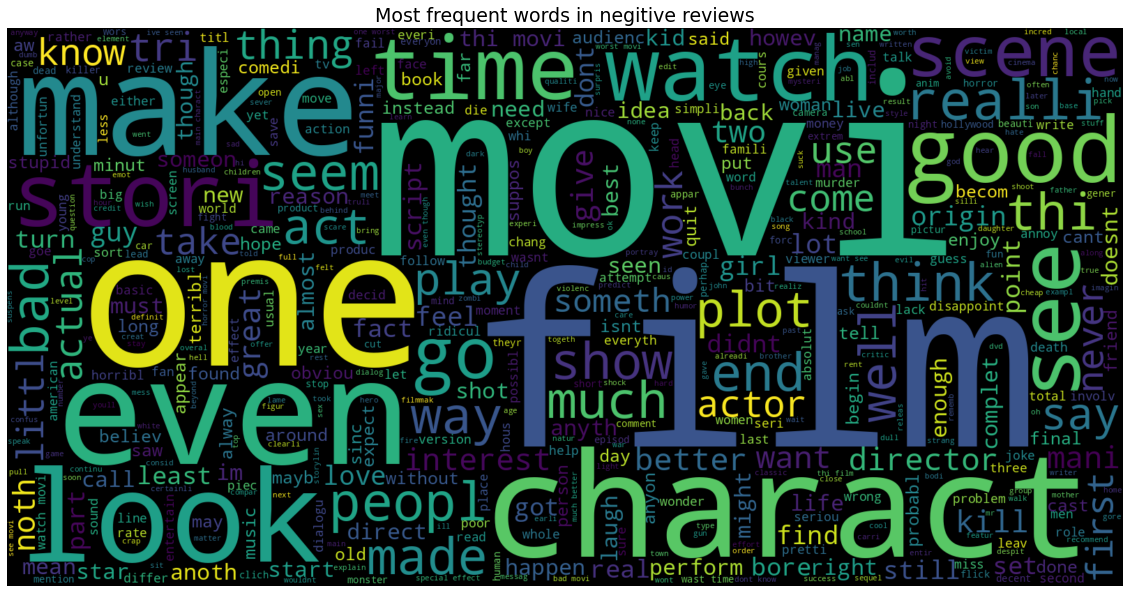

In [32]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negitive reviews', fontsize = 19)
plt.show()

In [33]:
# print the first 10th most common words
from collections import Counter
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(10)

[('i', 7969),
 ('movi', 6271),
 ('film', 4843),
 ('the', 4492),
 ('one', 2826),
 ('like', 2687),
 ('it', 1870),
 ('make', 1782),
 ('get', 1781),
 ('even', 1761)]

# **Splitting data**

In [34]:
X = df['review']
Y = df['sentiment']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
# Term Frequency-Inverse Document Frequency model (TFIDF)
# It is used to convert text documents to matrix of tfidf features
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [37]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (3848, 35075)
Size of y_train:  (3848,)
Size of x_test:  (1650, 35075)
Size of y_test:  (1650,)


# **Evaluation**
We will use several machine learning models to do different tests and select the best

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
# LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("train score : ", lr.score(x_train, y_train))
print("test score : ", lr.score(x_test, y_test))
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_pred, y_test)
print("Test accuracy: {:.2f}%".format(lr_acc*100))

train score :  0.954002079002079
test score :  0.8624242424242424
Test accuracy: 86.24%


In [40]:
lr_report=classification_report(y_test,lr_pred,target_names=['Positive','Negative'])
print(lr_report)

              precision    recall  f1-score   support

    Positive       0.88      0.85      0.87       860
    Negative       0.85      0.87      0.86       790

    accuracy                           0.86      1650
   macro avg       0.86      0.86      0.86      1650
weighted avg       0.86      0.86      0.86      1650



In [41]:
def cm (y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Text(0.5, 1.0, 'Confusion matrix of Logistic Regression')

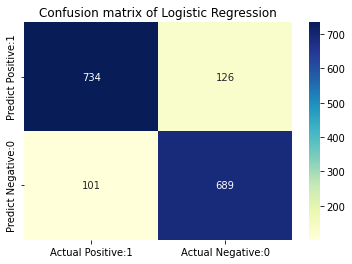

In [42]:
cm(y_test,lr_pred)
plt.title('Confusion matrix of Logistic Regression')

In [43]:
# Linear svm
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)
print("train score : ", lsvm.score(x_train, y_train))
print("test score : ", lsvm.score(x_test, y_test))
lsvm_pred = lsvm.predict(x_test)
lsvm_acc = accuracy_score(lsvm_pred, y_test)
print("Test accuracy: {:.2f}%".format(lsvm_acc*100))

train score :  0.9992203742203742
test score :  0.8690909090909091
Test accuracy: 86.91%


In [44]:
lsvm_report=classification_report(y_test,lsvm_pred,target_names=['Positive','Negative'])
print(lsvm_report)

              precision    recall  f1-score   support

    Positive       0.89      0.86      0.87       860
    Negative       0.85      0.88      0.87       790

    accuracy                           0.87      1650
   macro avg       0.87      0.87      0.87      1650
weighted avg       0.87      0.87      0.87      1650



Text(0.5, 1.0, 'Confusion matrix of LinearSVC')

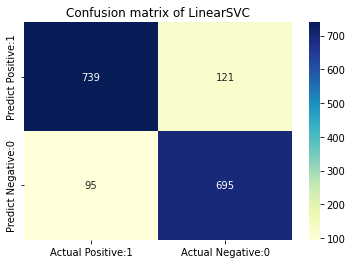

In [45]:
cm(y_test,lsvm_pred)
plt.title('Confusion matrix of LinearSVC')

In [46]:
# MultinomialNB
mn = MultinomialNB()
mn.fit(x_train, y_train)
print("train score : ", mn.score(x_train, y_train))
print("test score : ", mn.score(x_test, y_test))
mn_pred = mn.predict(x_test)
mn_acc = accuracy_score(mn_pred, y_test)
print("Test accuracy: {:.2f}%".format(mn_acc*100))

train score :  0.9586798336798337
test score :  0.8321212121212122
Test accuracy: 83.21%


In [47]:
mn_report=classification_report(y_test,mn_pred,target_names=['Positive','Negative'])
print(mn_report)

              precision    recall  f1-score   support

    Positive       0.81      0.89      0.85       860
    Negative       0.86      0.77      0.82       790

    accuracy                           0.83      1650
   macro avg       0.84      0.83      0.83      1650
weighted avg       0.83      0.83      0.83      1650



Text(0.5, 1.0, 'Confusion matrix of MultinomialNB')

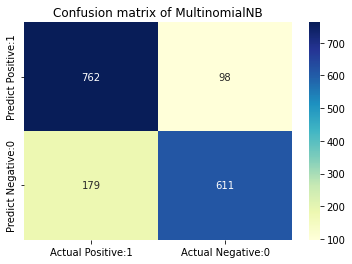

In [48]:
cm(y_test,mn_pred)
plt.title('Confusion matrix of MultinomialNB')

In [49]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("train score : ", dt.score(x_train, y_train))
print("test score : ", dt.score(x_test, y_test))
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
print("Test accuracy: {:.2f}%".format(dt_acc*100))

train score :  1.0
test score :  0.686060606060606
Test accuracy: 68.61%


In [75]:
dt_report=classification_report(y_test,mn_pred,target_names=['Positive','Negative'])
print(dt_report)

              precision    recall  f1-score   support

    Positive       0.81      0.89      0.85       860
    Negative       0.86      0.77      0.82       790

    accuracy                           0.83      1650
   macro avg       0.84      0.83      0.83      1650
weighted avg       0.83      0.83      0.83      1650



Text(0.5, 1.0, 'Confusion matrix of Decision Tree Classifier')

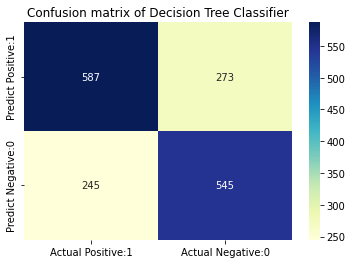

In [77]:
cm(y_test,dt_pred)
plt.title('Confusion matrix of Decision Tree Classifier')

In [74]:
# comparison betweem different ml algorithms
comp = {'Algorithm': ['Logistic Regression', 'MultinomialNB','LinearSVC','DecisionTreeClassifier'], 'Test Accuracy': [lr_acc*100, mn_acc*100,lsvm_acc*100,dt_acc*100]}
pd.DataFrame(data=comp)

,Algorithm,Test Accuracy
0,Logistic Regression,86.242424
1,MultinomialNB,83.212121
2,LinearSVC,86.909091
3,DecisionTreeClassifier,68.606061
